In [1]:
from keras.models import load_model
my_model = load_model(r"C:\Users\gk336\Downloads\brats_3d.hdf5", 
                      compile=False)

In [2]:
from keras.metrics import MeanIoU
import os
import numpy as np

In [3]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [4]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

In [5]:

val_img_dir = r"C:\Users\gk336\Downloads\brats\Data\val\train\\"
val_mask_dir = r"C:\Users\gk336\Downloads\brats\Data\val\mask\\"
val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)
batch_size=4 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)


1/1 [==============================] - 13s 13s/step


In [6]:
img_num = 82

test_img = np.load(r"C:\Users\gk336\Downloads\brats\Data\val\train\\"+str(img_num)+".npy")

test_mask = np.load(r"C:\Users\gk336\Downloads\brats\Data\val\mask\\"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification


1/1 [==============================] - 2s 2s/step


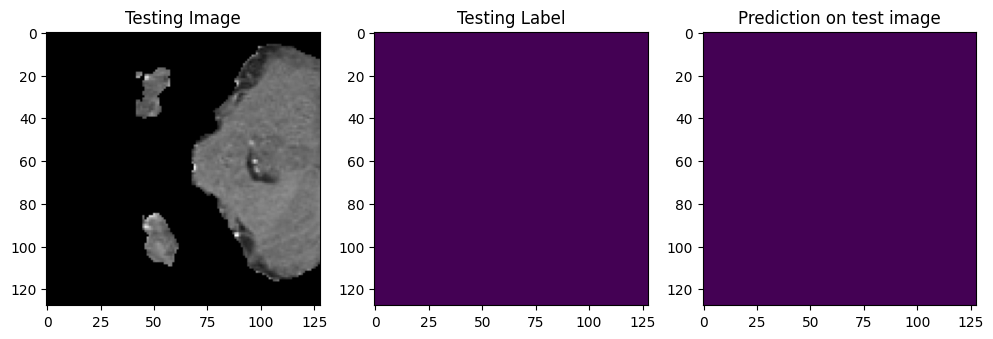

In [7]:
from matplotlib import pyplot as plt
import random

n_slice=random.randint(0, test_prediction_argmax.shape[2])

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

RAW TESTING

ModuleNotFoundError: No module named 'nibable'

In [18]:

# import scaler
# from glob import glob
# import nibable as nib
# t2_list = sorted(glob.glob(r'C:\Users\gk336\Downloads\brats\BraTS2020_ValidationData\MICCAI_BraTS2020_ValidationData/*/*t2.nii'))
# t1ce_list = sorted(glob.glob(r'C:\Users\gk336\Downloads\brats\BraTS2020_ValidationData\MICCAI_BraTS2020_ValidationData/*/*t1ce.nii'))
# flair_list = sorted(glob.glob(r'C:\Users\gk336\Downloads\brats\BraTS2020_ValidationData\MICCAI_BraTS2020_ValidationData/*/*flair.nii'))

# #Each volume generates 18 64x64x64x4 sub-volumes. 
# #Total 369 volumes = 6642 sub volumes

# for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
#     print("Now preparing image and masks number: ", img)
      
#     temp_image_t2=nib.load(t2_list[img]).get_fdata()
#     temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
#     temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
#     temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
#     temp_image_flair=nib.load(flair_list[img]).get_fdata()
#     temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
#     temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
#     #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#     #cropping x, y, and z
#     temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
#     np.save(r"C:\Users\gk336\Downloads\brats\TestData\\"+str(img)+'.npy', temp_combined_images)

ModuleNotFoundError: No module named 'nibable'

In [20]:
img_num = 36

test_img = np.load(r"C:\Users\gk336\Downloads\brats\TestData\\"+str(img_num)+".npy")

# test_mask = np.load(r"C:\Users\gk336\Downloads\brats\Data\val\mask\\"+str(img_num)+".npy")
# test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]


# print(test_prediction_argmax.shape)
# print(test_mask_argmax.shape)
# print(np.unique(test_prediction_argmax))


#Plot individual slices from test predictions for verification


1/1 [==============================] - 2s 2s/step


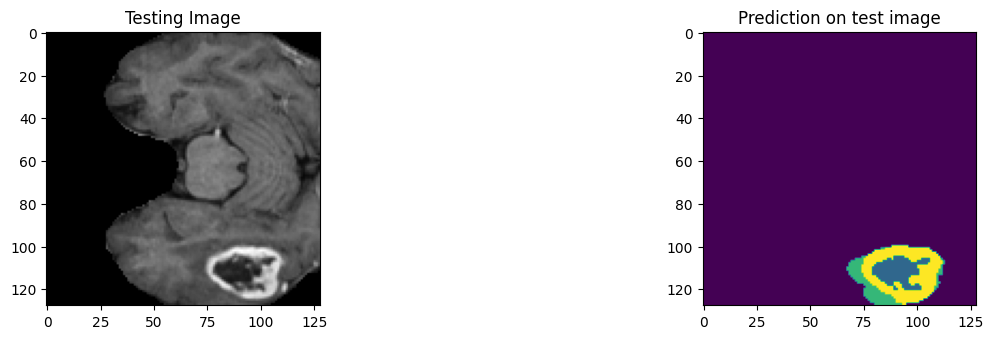

In [21]:
from matplotlib import pyplot as plt
import random

n_slice=random.randint(0, test_prediction_argmax.shape[2])

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
# plt.subplot(232)
# plt.title('Testing Label')
# plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()